In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

RANDOM_STATE = 42

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    classification_report,
    RocCurveDisplay,
    PrecisionRecallDisplay,
    brier_score_loss,
)

from sklearn.calibration import CalibratedClassifierCV

In [21]:
df = pd.read_csv('S05-hw-dataset.csv')

In [22]:
df.head()

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
0,1,25,94074,22,839,0.547339,1,7,0,0,26057,5229,0.080052,19,1,8,0
1,2,58,51884,26,565,0.290882,1,1,0,1,16221,11595,0.428311,15,0,7,0
2,3,53,48656,39,561,0.522340,1,13,0,0,55448,-2947,0.770883,15,4,5,0
3,4,42,81492,30,582,0.709123,2,10,1,1,35188,17727,0.357619,0,2,7,1
4,5,42,94713,8,642,0.793392,3,3,0,0,0,-404,0.414260,17,1,10,1


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   client_id                       3000 non-null   int64  
 1   age                             3000 non-null   int64  
 2   income                          3000 non-null   int64  
 3   years_employed                  3000 non-null   int64  
 4   credit_score                    3000 non-null   int64  
 5   debt_to_income                  3000 non-null   float64
 6   num_credit_cards                3000 non-null   int64  
 7   num_late_payments               3000 non-null   int64  
 8   has_mortgage                    3000 non-null   int64  
 9   has_car_loan                    3000 non-null   int64  
 10  savings_balance                 3000 non-null   int64  
 11  checking_balance                3000 non-null   int64  
 12  region_risk_score               30

In [24]:
df.describe()

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,45.059667,69658.992000,19.577667,649.285333,0.284065,3.494667,6.869333,0.495000,0.501333,20607.256667,5559.684333,0.400175,9.524667,1.976333,6.968667,0.410333
std,866.169729,14.192883,24742.235182,11.381497,69.955852,0.161112,2.289917,4.291278,0.500058,0.500082,14035.209739,6306.032612,0.204529,5.779030,1.408700,4.349942,0.491976
min,1.000000,21.000000,15000.000000,0.000000,402.000000,0.006147,0.000000,0.000000,0.000000,0.000000,0.000000,-3000.000000,0.001148,0.000000,0.000000,0.000000,0.000000
25%,750.750000,33.000000,52641.750000,10.000000,604.000000,0.157796,1.000000,3.000000,0.000000,0.000000,9612.250000,341.500000,0.239208,5.000000,1.000000,3.000000,0.000000
50%,1500.500000,45.000000,69784.500000,20.000000,647.000000,0.261726,3.000000,7.000000,0.000000,1.000000,20021.000000,5114.500000,0.381992,10.000000,2.000000,7.000000,0.000000
75%,2250.250000,57.000000,85874.250000,29.000000,697.000000,0.388886,6.000000,10.000000,1.000000,1.000000,30101.250000,9906.250000,0.549213,15.000000,3.000000,11.000000,1.000000
max,3000.000000,69.000000,156351.000000,39.000000,850.000000,0.878343,7.000000,14.000000,1.000000,1.000000,75237.000000,29335.000000,0.961733,19.000000,4.000000,14.000000,1.000000


In [25]:
df['default'].value_counts(normalize=True)

default
0    0.589667
1    0.410333
Name: proportion, dtype: float64

В датасете 3000 объектов и 17 признаков
Явных анамалий нет
Таргет распределен примерно в отношении 6 к 4

In [26]:
X = df.drop(columns=['default', 'client_id'])
y = df['default']

In [27]:
X_temp, X_test, y_temp, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y,
    random_state=RANDOM_STATE,         
)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp,
    y_temp,
    test_size=0.25,
    stratify=y_temp,
    random_state=RANDOM_STATE,
)

In [28]:
baseline = DummyClassifier(strategy="most_frequent", random_state=RANDOM_STATE)

baseline.fit(X_train, y_train)

y_val_pred_baseline = baseline.predict(X_val)
y_val_proba_baseline = baseline.predict_proba(X_val)[:, 1]

print("Accuracy :", accuracy_score(y_val, y_val_pred_baseline))
print("Precision:", precision_score(y_val, y_val_pred_baseline, zero_division=0))
print("Recall   :", recall_score(y_val, y_val_pred_baseline, zero_division=0))
print("F1-score :", f1_score(y_val, y_val_pred_baseline, zero_division=0))
print("ROC-AUC  :", roc_auc_score(y_val, y_val_proba_baseline))


Accuracy : 0.59
Precision: 0.0
Recall   : 0.0
F1-score : 0.0
ROC-AUC  : 0.5


In [29]:
y_test_pred_baseline = baseline.predict(X_test)
y_test_proba_baseline = baseline.predict_proba(X_test)[:, 1]

print("Accuracy :", accuracy_score(y_test, y_test_pred_baseline))
print("Precision:", precision_score(y_test, y_test_pred_baseline, zero_division=0))
print("Recall   :", recall_score(y_test, y_test_pred_baseline, zero_division=0))
print("F1-score :", f1_score(y_test, y_test_pred_baseline, zero_division=0))
print("ROC-AUC  :", roc_auc_score(y_test, y_test_proba_baseline))

Accuracy : 0.59
Precision: 0.0
Recall   : 0.0
F1-score : 0.0
ROC-AUC  : 0.5


Бейзлайн модель предсказала значения с точность равной распределению классов, мы будем использовать ее как точку отсчета для сравнения с последующими моделями

In [30]:
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(max_iter=1000, random_state=RANDOM_STATE))
])

pipe.fit(X_train, y_train)

y_val_pred = pipe.predict(X_val)
y_val_proba = pipe.predict_proba(X_val)[:, 1]

print("Accuracy :", accuracy_score(y_val, y_val_pred))
print("Precision:", precision_score(y_val, y_val_pred, zero_division=0))
print("Recall   :", recall_score(y_val, y_val_pred, zero_division=0))
print("F1-score :", f1_score(y_val, y_val_pred, zero_division=0))
print("ROC-AUC  :", roc_auc_score(y_val, y_val_proba))

print(classification_report(y_val, y_val_pred))

Accuracy : 0.815
Precision: 0.8497409326424871
Recall   : 0.6666666666666666
F1-score : 0.7471526195899773
ROC-AUC  : 0.8746038307840706
              precision    recall  f1-score   support

           0       0.80      0.92      0.85       354
           1       0.85      0.67      0.75       246

    accuracy                           0.81       600
   macro avg       0.82      0.79      0.80       600
weighted avg       0.82      0.81      0.81       600



In [31]:
param_grid = {
    "logreg__C": [0.01, 0.1, 1.0, 10.0, 100.0],
}

grid_search = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring="roc_auc",    # можно поменять на f1, recall и т.д.
    cv=5,
    n_jobs=-1,
    verbose=1,
)

grid_search.fit(X_train, y_train)

print("Лучшие параметры:", grid_search.best_params_)
print("Лучший ROC-AUC (по CV):", grid_search.best_score_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Лучшие параметры: {'logreg__C': 0.1}
Лучший ROC-AUC (по CV): 0.853594897701044


In [32]:
best_model = grid_search.best_estimator_

y_test_pred = best_model.predict(X_test)
y_test_proba = best_model.predict_proba(X_test)[:, 1]

print("Accuracy :", accuracy_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred, zero_division=0))
print("Recall   :", recall_score(y_test, y_test_pred, zero_division=0))
print("F1-score :", f1_score(y_test, y_test_pred, zero_division=0))
print("ROC-AUC  :", roc_auc_score(y_test, y_test_proba))

Accuracy : 0.8033333333333333
Precision: 0.8047619047619048
Recall   : 0.6869918699186992
F1-score : 0.7412280701754386
ROC-AUC  : 0.8748794267603692


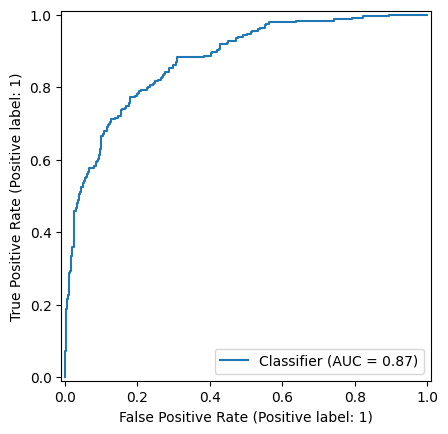

In [33]:
RocCurveDisplay.from_predictions(
    y_test,
    y_test_proba,
)
plt.savefig('figures/RocCurve.png')

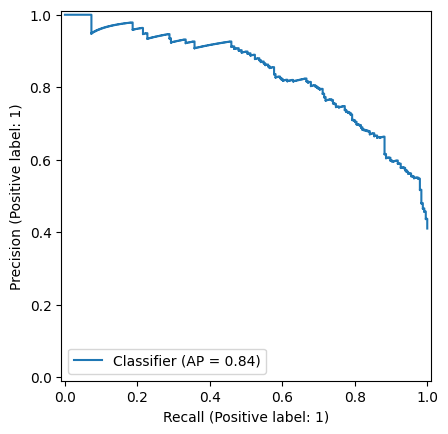

In [34]:
PrecisionRecallDisplay.from_predictions(
    y_test,
    y_test_proba,
)
plt.savefig('figures/PRCurve.png')

In [35]:
comparison = {
    'Accuracy': [accuracy_score(y_test, y_test_pred_baseline), accuracy_score(y_test, y_test_pred)],
    'Precision': [precision_score(y_test, y_test_pred_baseline, zero_division=0), precision_score(y_test, y_test_pred, zero_division=0)],
    'Recall': [recall_score(y_test, y_test_pred_baseline, zero_division=0), recall_score(y_test, y_test_pred, zero_division=0)],
    'F1-score': [f1_score(y_test, y_test_pred_baseline, zero_division=0), f1_score(y_test, y_test_pred, zero_division=0)],
    'ROC-AUC': [roc_auc_score(y_test, y_test_pred_baseline), roc_auc_score(y_test, y_test_pred)]
}
comparison_pd = pd.DataFrame(comparison , index=['BaseLine', 'Log_Regression']).T
comparison_pd.to_csv('artifacts/comparison.csv')
comparison_pd

,BaseLine,Log_Regression
Accuracy,0.59,0.803333
Precision,0.00,0.804762
Recall,0.00,0.686992
F1-score,0.00,0.741228
ROC-AUC,0.50,0.785586


Бейзлайн модель предсказала значения с точностью accuracy 0.59 равной распределению классов и ROC-AUC 0.5 равным случайному угадыванию. Логистическая регрессия это уже настоящая модель с точностью 0.8(+21%) и ROC-AUC 0.79(+29%). Наилучшее качество достигается при регуляризации С = 0.1. С ростом C качество модели падает. Логистическая регрессия лучше бейзлайна. Модель  сбалансирована и не переобучена. Для задачи классификации логистическая регрессия - разумный выбор.